In [1]:
%matplotlib inline
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import random
import re
import scipy.signal
import textblob
#import yellowbrick

In [2]:
font_name = {'fontname': 'Source Sans Pro'}
mono_name = {'fontname': 'Source Serif Pro'}
font_size = {'fontsize': 13}
color_label = {'color': '#333333'}

In [3]:
analyser = SentimentIntensityAnalyzer()

en_stopwords = stopwords.words('english')

lines = ""
with open('text.txt') as f_in:
    lines = ''.join(f_in.readlines())
    
between_bn = re.compile(r'(\n+[\d]+[ ]*\n+)')
multiple_bn = re.compile(r'\n+')
text = re.sub(between_bn, '', lines)
raw = re.sub(multiple_bn, '', text)

sentences = [s for s in nltk.sent_tokenize(raw)]
tokens = [t.lower() for t in nltk.word_tokenize(raw) if t.isalpha()]

# no stopwords
n_tokens = [t for t in tokens if t not in en_stopwords]

## Symbols, words, lexical richness

In [4]:
print('Len in chars:', len(raw))
print('Len in words:', len(tokens))

distinct_tokens = set(tokens)
lexical_richness = len(distinct_tokens) / len(tokens)
print('# of distinct words:', len(distinct_tokens))
print('Lexical richness:', lexical_richness)

Len in chars: 632093
Len in words: 118378
# of distinct words: 7145
Lexical richness: 0.0603574988595854


In [5]:
ntext = nltk.Text(tokens)
ntext.collocations(window_size=4)

storm trooper; dining hall; long time; said reiko; take care; per
cent; shook head; hey watanabe; tell truth; said midori; kobayashi
bookshop; norwegian wood; straight away; record shop; ami hostel;
foreign ministry; stuff like; sunday morning; pretty much; first time


In [6]:
freq = nltk.FreqDist(n_tokens)
print(len(freq.hapaxes()))
print(', '.join([t for t in random.sample(freq.hapaxes(), 50)]))

3060
universally, grime, evolve, dilapidated, nostrils, corolla, housed, emerging, orchestral, spotless, volunteer, kiosks, pea, dante, springwinding, instruments, rake, affectation, oops, stacked, trigonometry, realizing, circled, wishes, emptiness, developments, takashimaya, durbin, lightness, foreheads, blackish, twinkle, flit, assumption, filtering, echoes, pinnacle, flecked, van, weighing, pry, apologetically, evacuate, fibres, hammered, procedures, annoyed, shells, sets, urged


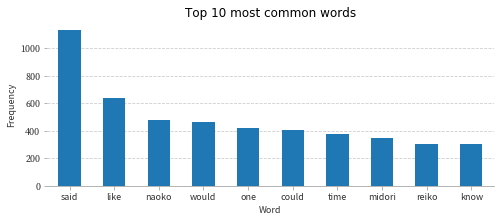

In [7]:
fig, ax = plt.subplots(figsize=(8,3))

df_freq = pd.DataFrame(freq.most_common(10))
df_freq.plot(kind='bar', x=df_freq[0], legend=False, title='Top 10 most common words', ax=ax, zorder=2, cmap='tab20');

#ax.set_title('About Naoko and Midori');
#ax.set_yticks([1,1.1])
#ax.set_ylim([0.9,1.2])
#ax.set_xlim([0,120000])

#ax.set_xticklabels(map(lambda x: '{0:.0f}%'.format((100*x)/120000), [0, 20000, 40000, 60000, 80000, 100000, 120000]), **color_label, **mono_name)
#ax.set_yticklabels(['Naoko ({})'.format(freq.get('naoko')), 'Midori ({})'.format(freq.get('midori'))], **font_name, **font_size);

ax.set_xlabel('Word', **font_name, **color_label);
ax.set_ylabel('Frequency', **font_name, **color_label);
ax.set_yticklabels(map(str, np.arange(0,1001,200)), **mono_name, **color_label)
ax.set_xticklabels(df_freq[0].values, **font_name, **color_label)

ax.yaxis.grid(color='#cccccc', linestyle='--', zorder=1)

ax.tick_params(axis='both', color='#a3a3a3')
ax.xaxis.set_tick_params(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#a3a3a3')
ax.spines['left'].set_color('#a3a3a3')

#plt.savefig('freq.pdf', dpi=100, bbox_inches='tight')
fig.savefig('freq.png', dpi=100, bbox_inches='tight')

## Le componenti femminili

In [8]:
for name in ('Naoko', 'Midori', 'Reiko'):
    print('{}:'.format(name), freq.get(name.lower()))

Naoko: 476
Midori: 349
Reiko: 306


In [9]:
def get_dispersion(text, word, flag=None):
    if flag:
        return [flag if word == w else np.nan for i, w in enumerate(text)]
    return [i+1 if word == w else np.nan for i, w in enumerate(text)]

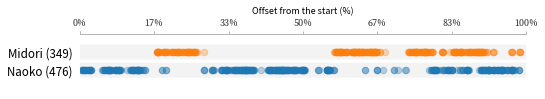

In [10]:
naoko = get_dispersion(ntext, 'naoko', 1)
midori = get_dispersion(ntext, 'midori', 1.1)

fig, ax = plt.subplots(figsize=(8,1))

ax.plot(np.arange(0, len(midori)), [1 for _ in range(len(midori))], linewidth=15, color='#f3f3f3', zorder=1)
ax.plot(np.arange(0, len(midori)), [1.1 for _ in range(len(midori))], linewidth=15, color='#f3f3f3', zorder=1)

ax.scatter(np.arange(0, len(naoko)), naoko, s=42, marker='o', alpha=.3, zorder=2)
ax.scatter(np.arange(0, len(midori)), midori, s=42, marker='o', alpha=.3, zorder=2)

#ax.set_title('About Naoko and Midori');
ax.set_yticks([1,1.1])
ax.set_ylim([0.9,1.2])
ax.set_xlim([0,120000])

ax.set_xticklabels(map(lambda x: '{0:.0f}%'.format((100*x)/120000), [0, 20000, 40000, 60000, 80000, 100000, 120000]), **color_label, **mono_name)
ax.set_yticklabels(['Naoko ({})'.format(freq.get('naoko')), 'Midori ({})'.format(freq.get('midori'))], **font_name, **font_size);


ax.set_xlabel('Offset from the start (%)', **font_name);

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('#a3a3a3')

#plt.savefig('naoko_midori.pdf', dpi=100, bbox_inches='tight')
fig.savefig('naoko_midori.png', dpi=100, bbox_inches='tight')

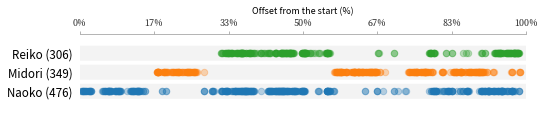

In [11]:
naoko = get_dispersion(ntext, 'naoko', 1)
midori = get_dispersion(ntext, 'midori', 1.1)
reiko = get_dispersion(ntext, 'reiko', 1.2)

fig, ax = plt.subplots(figsize=(8,1.4))

ax.plot(np.arange(0, len(midori)), [1 for _ in range(len(midori))], linewidth=15, color='#f3f3f3', zorder=1)
ax.plot(np.arange(0, len(midori)), [1.1 for _ in range(len(midori))], linewidth=15, color='#f3f3f3', zorder=1)
ax.plot(np.arange(0, len(reiko)), [1.2 for _ in range(len(midori))], linewidth=15, color='#f3f3f3', zorder=1)

ax.scatter(np.arange(0, len(naoko)), naoko, s=42, marker='o', alpha=.3, zorder=2)
ax.scatter(np.arange(0, len(midori)), midori, s=42, marker='o', alpha=.3, zorder=2)
ax.scatter(np.arange(0, len(reiko)), reiko, s=42, marker='o', alpha=.3, zorder=2)

ax.set_yticks([1,1.1,1.2])
ax.set_ylim([0.9,1.3])
ax.set_xlim([0,120000])

ax.set_xticklabels(map(lambda x: '{0:.0f}%'.format((100*x)/120000), [0, 20000, 40000, 60000, 80000, 100000, 120000]), **color_label, **mono_name)
ax.set_yticklabels(['Naoko ({})'.format(freq.get('naoko')), 'Midori ({})'.format(freq.get('midori')), 'Reiko ({})'.format(freq.get('reiko'))], **font_name, **font_size);


ax.set_xlabel('Offset from the start (%)', **font_name);

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('#a3a3a3')

#plt.savefig('naoko_midori_reiko.pdf', dpi=100, bbox_inches='tight')
fig.savefig('naoko_midori_reiko.png', dpi=100, bbox_inches='tight')

### Le componenti maschili

In [12]:
storm_freq = sum([1 for i in range(len(n_tokens)-1) if n_tokens[i] == 'storm' and n_tokens[i+1] == 'trooper'])
nagasawa_freq = freq.get('nagasawa')
print('Storm Trooper:', storm_freq)
print('Nagasawa:', nagasawa_freq)

Storm Trooper: 34
Nagasawa: 131


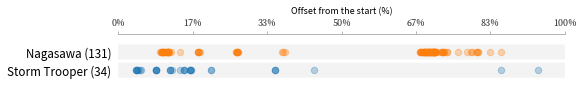

In [13]:
storm_y = [1.0 if ntext[i] == 'storm' and ntext[i+1] == 'trooper' else np.nan for i in range(len(ntext)-1)]
nagasawa_y = get_dispersion(ntext, 'nagasawa', 1.1)

fig, ax = plt.subplots(figsize=(8,1))

ax.plot(np.arange(0, len(storm_y)), [1 for _ in range(len(storm_y))], linewidth=15, color='#f3f3f3', zorder=1)
ax.plot(np.arange(0, len(storm_y)), [1.1 for _ in range(len(storm_y))], linewidth=15, color='#f3f3f3', zorder=1)

ax.scatter(np.arange(0, len(storm_y)), storm_y, s=42, marker='o', alpha=.3, zorder=2)
ax.scatter(np.arange(0, len(nagasawa_y)), nagasawa_y, s=42, marker='o', alpha=.3, zorder=2)

ax.set_yticks([1,1.1])
ax.set_ylim([0.9,1.2])
ax.set_xlim([0,120000])

ax.set_xticklabels(map(lambda x: '{0:.0f}%'.format((100*x)/120000), [0, 20000, 40000, 60000, 80000, 100000, 120000]), **color_label, **mono_name)
ax.set_yticklabels(['Storm Trooper ({})'.format(storm_freq), 'Nagasawa ({})'.format(nagasawa_freq)], **font_name, **font_size);


ax.set_xlabel('Offset from the start (%)', **font_name);

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('#a3a3a3')

#plt.savefig('storm_nagasawa.pdf', dpi=100, bbox_inches='tight')
fig.savefig('storm_nagasawa.png', dpi=100, bbox_inches='tight')

## Sentiment

In [14]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

scores = [sentiment_analyzer_scores(sentence) for sentence in sentences]
compound_ts = pd.Series(list(map(lambda x: x['compound'], scores)))
positive_ts = pd.Series(list(map(lambda x: x['pos'], scores)))
negative_ts = pd.Series(list(map(lambda x: x['neg'], scores)))
neutral_ts = pd.Series(list(map(lambda x: x['neu'], scores)))

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


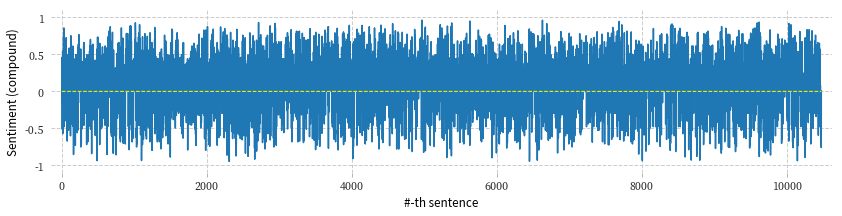

In [15]:
# compound
fig, ax = plt.subplots(figsize=(14,3))
compound_ts.plot(kind='line', ax=ax);

x_axis_values = compound_ts.index

ax.plot(x_axis_values, [0.0 for _ in x_axis_values], '--', linewidth=1, color='yellow')

ax.grid(True, color='#cccccc', linestyle='--', linewidth=1)

offset_x = 150
offset_y = .1
ax.set_xlim([-offset_x, compound_ts.last_valid_index()+offset_x])
ax.set_ylim([-1-offset_y, 1+offset_y])

ax.set_yticks([-1, -.5, 0, .5, 1])
ax.set_yticklabels(map(str, [-1, -.5, 0, .5, 1]), **mono_name, **color_label, **{'fontsize': 12})
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels(map(str,[0, 2000, 4000, 6000, 8000, 10000]), **mono_name, **color_label, **{'fontsize': 12})

ax.set_xlabel('#-th sentence', **font_name, **font_size)
ax.set_ylabel('Sentiment (compound)', **font_name, **font_size)

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('plot_compound_raw.pdf', dpi=100, bbox_inches='tight')

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


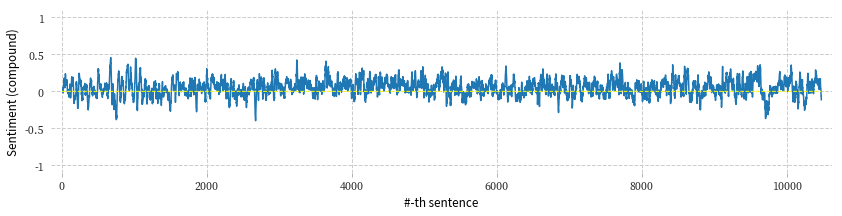

In [29]:
roll_wind = 15

fig, ax = plt.subplots(figsize=(14,3))

y_mean = compound_ts.rolling(window=roll_wind).mean().values
x_axis_values = compound_ts.index

ax.plot(x_axis_values, y_mean, label='Mean (w=10)')
ax.plot(x_axis_values, [0.0 for _ in x_axis_values], '--', linewidth=1, color='yellow')

ax.grid(True, color='#cccccc', linestyle='--', linewidth=1)

offset_x = 150
offset_y = .1
ax.set_xlim([-offset_x, compound_ts.last_valid_index()+offset_x])
ax.set_ylim([-1-offset_y, 1+offset_y])

ax.set_yticks([-1, -.5, 0, .5, 1])
ax.set_yticklabels(map(str, [-1, -.5, 0, .5, 1]), **mono_name, **color_label, **{'fontsize': 12})
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels(map(str,[0, 2000, 4000, 6000, 8000, 10000]), **mono_name, **color_label, **{'fontsize': 12})

ax.set_xlabel('#-th sentence', **font_name, **font_size)
ax.set_ylabel('Sentiment (compound)', **font_name, **font_size)

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('plot_compound_mean.pdf', dpi=100, bbox_inches='tight')

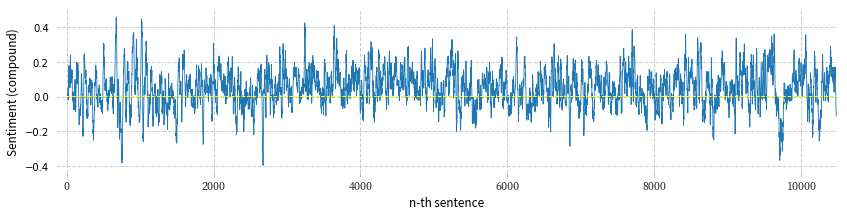

In [65]:
roll_wind = 15

fig, ax = plt.subplots(figsize=(14,3))

y_median = compound_ts.rolling(window=roll_wind).mean().values
x_axis_values = compound_ts.rolling(window=roll_wind).mean().index

ax.plot(x_axis_values, y_median, '-', linewidth=.85, label='Median (w=10)')
ax.plot(x_axis_values, [0.0 for _ in x_axis_values], '--', linewidth=1, color='yellow')

ax.grid(True, color='#cccccc', linestyle='--', linewidth=1)

#offset_x = 150
offset_y = .1
ax.set_xlim([-offset_x, x_axis_values[-1]+10])
#ax.set_ylim([-1-offset_y, 1+offset_y])

#ax.set_yticks([-1, -.5, 0, .5, 1])
#ax.set_yticklabels(map(str, [-1, -.5, 0, .5, 1]), **mono_name, **color_label, **{'fontsize': 12})
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels(map(str,[0, 2000, 4000, 6000, 8000, 10000]), **mono_name, **color_label, **{'fontsize': 12})

ax.set_xlabel('n-th sentence', **font_name, **font_size)
ax.set_ylabel('Sentiment (compound)', **font_name, **font_size)

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#plt.savefig('plot_compound_median.pdf', dpi=100, bbox_inches='tight')
plt.savefig('plot_compound_median.png', dpi=100, bbox_inches='tight')

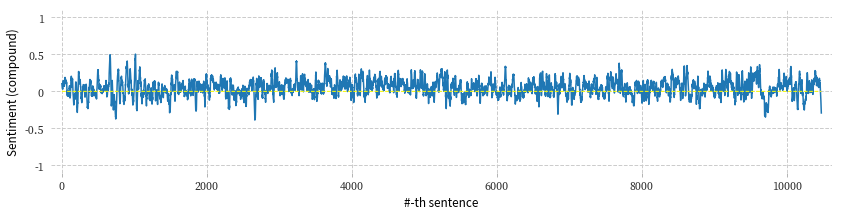

In [28]:
fig, ax = plt.subplots(figsize=(14,3))

#compound_ts.rolling(window=10).mean().plot(kind='line', ax=ax);
y_savgol = scipy.signal.savgol_filter(compound_ts.values, 31, 2)

x_axis_values = compound_ts.index

ax.plot(x_axis_values, y_savgol)
ax.plot(x_axis_values, [0.0 for _ in x_axis_values], '--', linewidth=1, color='yellow')

ax.grid(True, color='#cccccc', linestyle='--', linewidth=1)

offset_x = 150
offset_y = .1
ax.set_xlim([-offset_x, compound_ts.last_valid_index()+offset_x])
ax.set_ylim([-1-offset_y, 1+offset_y])

ax.set_yticks([-1, -.5, 0, .5, 1])
ax.set_yticklabels(map(str, [-1, -.5, 0, .5, 1]), **mono_name, **color_label, **{'fontsize': 12})
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels(map(str,[0, 2000, 4000, 6000, 8000, 10000]), **mono_name, **color_label, **{'fontsize': 12})

ax.set_xlabel('#-th sentence', **font_name, **font_size)
ax.set_ylabel('Sentiment (compound)', **font_name, **font_size)

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#plt.savefig('plot_compound_savgol.pdf', dpi=100, bbox_inches='tight')

'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSansPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'SourceSerifPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


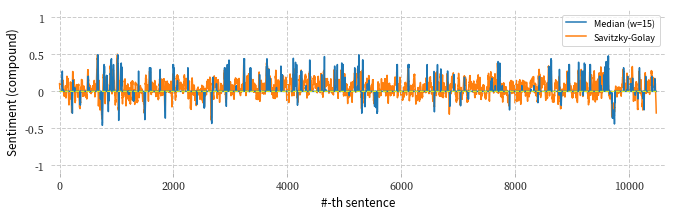

In [36]:
fig, ax = plt.subplots(figsize=(11,3))

#compound_ts.rolling(window=10).mean().plot(kind='line', ax=ax);
#y_savgol = scipy.signal.savgol_filter(compound_ts.values, 51, 2)
#y_median = compound_ts.rolling(window=50).median().values
#y_mean = compound_ts.rolling(window=50).mean().values

x_axis_values = compound_ts.index

#ax.plot(x_axis_values, y_mean, label='Avg (w={})'.format(roll_wind), zorder=3)
ax.plot(x_axis_values, y_median, label='Median (w={})'.format(roll_wind), zorder=2)
ax.plot(x_axis_values, y_savgol, label='Savitzky-Golay', zorder=1)
ax.plot(x_axis_values, [0.0 for _ in x_axis_values], '--', linewidth=1, color='yellow')

ax.grid(True, color='#cccccc', linestyle='--', linewidth=1)
plt.rc('font', family='Source Sans Pro')
ax.legend()

offset_x = 150
offset_y = .1
ax.set_xlim([-offset_x, compound_ts.last_valid_index()+offset_x])
ax.set_ylim([-1-offset_y, 1+offset_y])

ax.set_yticks([-1, -.5, 0, .5, 1])
ax.set_yticklabels(map(str, [-1, -.5, 0, .5, 1]), **mono_name, **color_label, **{'fontsize': 12})
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels(map(str,[0, 2000, 4000, 6000, 8000, 10000]), **mono_name, **color_label, **{'fontsize': 12})

ax.set_xlabel('#-th sentence', **font_name, **font_size)
ax.set_ylabel('Sentiment (compound)', **font_name, **font_size)

ax.tick_params(axis='x', color='#a3a3a3')
ax.tick_params(left=False)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('plot_compound_together.pdf', dpi=100, bbox_inches='tight')

In [32]:
compound_max = np.max([c['compound'] for c in scores])
compound_min = np.min([c['compound'] for c in scores])

max_list = [(i, sentence) for i, sentence in enumerate(sentences) if scores[i]['compound'] == compound_max]
min_list = [(i, sentence) for i, sentence in enumerate(sentences) if scores[i]['compound'] == compound_min]

print(compound_max, compound_min, len(max_list), len(min_list))
print(max_list)
print(min_list)

0.9612 -0.9468 1 1
[(4967, 'Her sister was one of those girls who are successful at every thing - a super-student, a super-athlete, popular, a leader, kind, straightforward, the boys liked her, her teachers loved her, her walls were covered with certificates of merit.')]
[(2310, "It's the worst kind of death - the person's in agony, the family goes through hell.")]


In [33]:
# first 5 moments
indexed_compound = [(i, c['compound']) for i, c in enumerate(scores)]
indexed_compound.sort(key=lambda x: x[1])

for i, c in indexed_compound[:5]:
    print(c, sentences[i])
    
for i, c in indexed_compound[-5:]:
    print(c, sentences[i])

-0.9468 It's the worst kind of death - the person's in agony, the family goes through hell.
-0.9428 He's a little weak, maybe, and he has absolutely no head for business, and people don't like him very much, but he's a hell of a lot better than the cheats and liars who go round smoothing things over because they're so slick.
-0.9369 There was a kind of suicide note, and it had obviously been a suicide, and they took it for granted that suicide was just one of those things that mental patients did.
-0.9349 The men made the older one to do all kinds of awful things by threatening to rape the sister, but soon the older sister is transformed into a raging masochist, and the younger one gets really turned on from having to watch all the contortions they put her through.
-0.9343 The quickest way to put a stop to this was to wait for him to leave the room and throw his goddamn radio out the goddamn window, but I knew if I did that all hell would break loose.
0.9349 It's like taking a boat out

### Correlations?

In [57]:
sentences_len = [len(s) for s in sentences]
sent_df = pd.DataFrame([(a,b) for a,b in zip(sentences_len, compound_ts)], columns=['Length', 'Compound'])

In [62]:
sent_df.corr()

,Length,Compound
Length,1.000000,0.072595
Compound,0.072595,1.000000
